# Netflix: Building Content For a Global Audience 

## Introduction

### Objetives: 
This project analyzes 5000 movies from 66 countries to help Netflix identify high-quality content investment oppotunitiies to improve its costs effiency on a high streaming content spending. This content analysis project is part of the three strategies we proposed in response of a Netflix Request for Proposal on improving content travelbility for a global audience
### Approach: 
We use regression models to predict movie scores to find the key features influencing a movie rating. We also analyze top plot keywords and popular genres to further help Netflix in creating original content
### Key findings: 
1.Gredient boosted tree model has the lowest MSE of 0.4

2.Drama and Comedey are the most popular genres. Common plot keywords include: love, friendship and murder

3.Drama and budget are among the top 3 important features for predicting a movie score

In [2]:
# data manipulation 
import pandas as pd
import numpy as np

# data visulization 
import seaborn as sns ; sns.set()
from seaborn import countplot
import matplotlib.pyplot as plt
import pydotplus 
from IPython.display import Image 
%matplotlib inline

# machine learning models
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics 
from sklearn.tree import export_graphviz
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Data Cleaning
## Import data
First, we import the movie dataset. This dateset has 5043 rows and 28 columns. It collects about 5000 movie data from 66 countries between 1916 - 2015.

In [3]:
movies=pd.read_csv('movie_data.csv')
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Based on the results below, the average movie IMDB score is 6.4; the average movie budget is 39.7 million and the average gross revenue is 48 million. 

In [4]:
movies.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


## Remove Duplicates 
We want to find out how many movies are duplicated in this dataset and remove them.

In [5]:
movies.duplicated().sum()

45

In [6]:
# drop the duplicated rows
movies.drop_duplicates(keep=False,inplace=True)

After removing, we not have 4953 rows down from the original 5043 row.

In [7]:
movies.shape

(4953, 28)

## Calculate Missing Values Percentage
Next, we will examine the missing values for each features. We will entirely remove columns that have too many missing values and remove the rows that has some missing values when the missing value proportion is not too high.I will use a missing value function here from stackoverflow. 

https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/39734251#39734251 

In [8]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

## Remove Missing Values
The results showed that gross, budget and aspect ratio has the highest amount of missing values.

In [9]:
missing_values_table(movies)

Your selected dataframe has 28 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values
gross,864,17.4
budget,482,9.7
aspect_ratio,325,6.6
content_rating,299,6.0
plot_keywords,151,3.0
title_year,106,2.1
director_name,102,2.1
director_facebook_likes,102,2.1
num_critic_for_reviews,48,1.0
actor_3_name,23,0.5


Here, we will remove the null value rows that are in the top 3 missing values columns instead of entirely droping these columns. We chose to drop the missing values rows rather than imputating and fill in with the mean values as each film has very different gross, budget and aspect ratio.

Now, we are down to 3750 rows from 4945 rows earlier, which is 24% of decrease.

In [10]:
movies=movies.dropna(subset=['gross','budget','aspect_ratio'])
movies.shape

(3750, 28)

## Fill Missing Values 
For the rest missing values columns, we will fill in with mean values

In [11]:
movies=movies.fillna(movies.mean())

In [12]:
movies.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        0
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        0
actor_2_name                  3
actor_1_facebook_likes        0
gross                         0
genres                        0
actor_1_name                  1
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  8
facenumber_in_poster          0
plot_keywords                19
movie_imdb_link               0
num_user_for_reviews          0
language                      2
country                       0
content_rating               32
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                  0
movie_facebook_likes          0
dtype: int64

We will drop the rows that still have missing values here

In [13]:
movies=movies.dropna(how='any')
movies.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

## Change Data Types
Next, we want to check the data types for each column and then make changes if needed. 

In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3695 entries, 0 to 5042
Data columns (total 28 columns):
color                        3695 non-null object
director_name                3695 non-null object
num_critic_for_reviews       3695 non-null float64
duration                     3695 non-null float64
director_facebook_likes      3695 non-null float64
actor_3_facebook_likes       3695 non-null float64
actor_2_name                 3695 non-null object
actor_1_facebook_likes       3695 non-null float64
gross                        3695 non-null float64
genres                       3695 non-null object
actor_1_name                 3695 non-null object
movie_title                  3695 non-null object
num_voted_users              3695 non-null int64
cast_total_facebook_likes    3695 non-null int64
actor_3_name                 3695 non-null object
facenumber_in_poster         3695 non-null float64
plot_keywords                3695 non-null object
movie_imdb_link              3695 non-

Here, we will only keep the 'imdb_score' and 'aspect_ratio' columns as float and change the rest numberical data columns from float to integer since columns like facebook likes or number of critic reviews are better presented as integers. 

In [15]:
#changes data types from float to integer
movies[['gross', 'budget','duration','actor_1_facebook_likes','actor_2_facebook_likes', \
         'actor_3_facebook_likes','director_facebook_likes','facenumber_in_poster','num_critic_for_reviews', \
         'num_user_for_reviews','title_year']] \
= movies[['gross', 'budget','duration','actor_1_facebook_likes','actor_2_facebook_likes', \
           'actor_3_facebook_likes','director_facebook_likes','facenumber_in_poster','num_critic_for_reviews', \
           'num_user_for_reviews','title_year']].astype(int)
movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews         int64
duration                       int64
director_facebook_likes        int64
actor_3_facebook_likes         int64
actor_2_name                  object
actor_1_facebook_likes         int64
gross                          int64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster           int64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews           int64
language                      object
country                       object
content_rating                object
budget                         int64
title_year                     int64
actor_2_facebook_likes         int64
imdb_score                   float64
aspect_ratio                 float64
m

## Reformat Movie Titles

Next, we will remove the extra signs after each movie title to make the column looks clean by using the replace() function.

In [79]:
movies['movie_title'] = movies['movie_title'].str.replace(r'¬†    ', '')
movies['movie_title'].head()

0                                      Avatar 
1    Pirates of the Caribbean: At World's End 
2                                     Spectre 
3                       The Dark Knight Rises 
5                                 John Carter 
Name: movie_title, dtype: object

## Reduce Movie Rating Categories 

The dataset has 12 different ratings as it contains different ratings from other countries as well. We will reduduce the rating categories down to 5.

In [80]:
movies['content_rating'].unique()

array(['PG-13', 'PG', 'G', 'R', 'Approved', 'NC-17', 'X', 'Not Rated',
       'Unrated', 'M', 'GP', 'Passed'], dtype=object)

According to Motion Picture Associate of America(MPAA), M and GP is the same as PG; X is the same as NG-17. We will then group the rest categories(approved, not rated, unrated and passed) to the most common movie rating R.
https://www.mpaa.org/film-ratings/ 

In [81]:
#replace old movie genres with new genres and save the changes to the movies dataframe
movies['content_rating'].replace(['M','GP'],'PG',inplace=True) 
movies['content_rating'].replace('X','NC-17',inplace=True)   
movies['content_rating'].replace(['Approved','Not Rated','Unrated','Passed'],'R',inplace=True)
movies['content_rating'].unique()
                       

array(['PG-13', 'PG', 'G', 'R', 'NC-17'], dtype=object)

In [82]:
movies.content_rating.value_counts()

R        1750
PG-13    1277
PG        565
G          87
NC-17      16
Name: content_rating, dtype: int64

# Exploratory Data Analysis

## Split Genre Types 
Before explore the movie genre columns, we need to split multiple genre types in each row into different columns. 


In [83]:
movies['genres'].head()

0    Action|Adventure|Fantasy|Sci-Fi
1           Action|Adventure|Fantasy
2          Action|Adventure|Thriller
3                    Action|Thriller
5            Action|Adventure|Sci-Fi
Name: genres, dtype: object

We will use split() function first to split up the genres. Then we will use get.dummies() to fill in null values in each rows. At last, we will join the newly dataframe with the original movies dataframe. 

In [84]:
#Use split function to split up the genres in each cell first
a=movies.genres.str.split('|').apply(pd.Series)

# one-hot encoding each column with dummy variables
a=movies.genres.str.get_dummies('|')

#join the new datadrame a with the movies dataframe
movies=movies.join(a)
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,0,0,0,0,0,1,0,0,0,0
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,0,0,0,0,0,0,0,0,0,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,0,0,0,0,0,0,0,1,0,0
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,0,0,0,0,0,0,0,1,0,0
5,Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,...,0,0,0,0,0,1,0,0,0,0


In [85]:
#show the number of movies in each genre
movies.iloc[:,28:].sum()

Action          944
Adventure       767
Animation       196
Biography       238
Comedy         1451
Crime           699
Documentary      45
Drama          1860
Family          438
Fantasy         502
Film-Noir         1
History         145
Horror          381
Music           147
Musical          96
Mystery         372
Romance         843
Sci-Fi          489
Sport           146
Thriller       1094
War             148
Western          55
dtype: int64

## Top 10 Movie Genres
Now we are ready to plot the chart. It showed that Drama, Comedy and Thrillers are the top 3 common genres.

Text(0.5,1,'Top 10 Movie Genres')

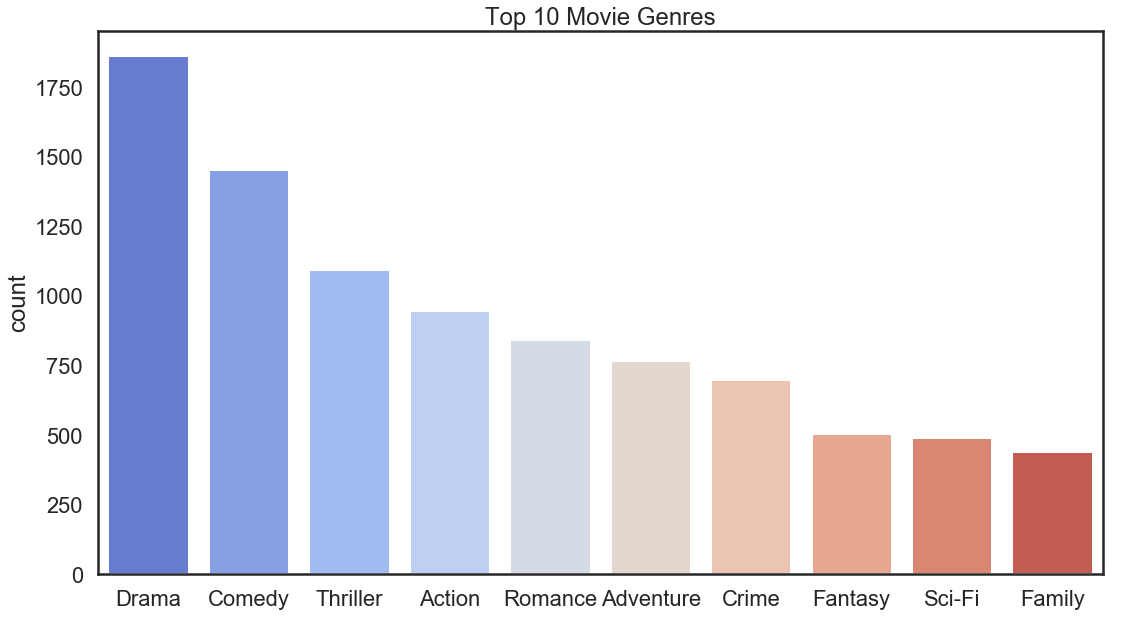

In [86]:
#set plot style and size
sns.set(style="white", context="poster")
plt.figure(figsize=(18, 10))

#create a bar chart for top 10 movie genres
p = sns.countplot(data=movies2, x ='genres',palette="coolwarm", \
    order = movies2.genres.value_counts().head(10).index) \
    .set_title('Top 10 Movie Genres') 
plt.xlabel('')
p

## Split Plot Keywords
Similar to what we did earlier with the movie genres, we need to split the plot keywords here as well.

In [63]:
movies['plot_keywords'].head()

0               avatar|future|marine|native|paraplegic
1    goddess|marriage ceremony|marriage proposal|pi...
2                  bomb|espionage|sequel|spy|terrorist
3    deception|imprisonment|lawlessness|police offi...
5    alien|american civil war|male nipple|mars|prin...
Name: plot_keywords, dtype: object

While the movie genres only have several different variables, each movie has a distinct list of plot keywords. Thus, we will use a different method to split the values. We wil use the explode() function, a solution to split the values from stackoverflow. 
https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows 

As the result shows, we have flattened the plot_keywords columns and then stacked different values here. Compare with the genre columns, we have created new columns for each split. We will only use the flattened new dataframe to analyze plot keyowrds and will not use this dataframe for future analysis.

In [64]:
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

movies2=explode(movies.assign(genres=movies.genres.str.split('|')), 'genres')
movies3=explode(movies.assign(plot_keywords=movies.plot_keywords.str.split('|')),'plot_keywords')
movies3[['movie_title','plot_keywords']].head()

,movie_title,plot_keywords
0,Avatar,avatar
1,Avatar,future
2,Avatar,marine
3,Avatar,native
4,Avatar,paraplegic


## 20 Most Common Plot Keywords
According to the chart below, keywords like 'love','friend' and 'murder' are the top 3 most common plot keywords. This insight could benefit Netflix to be more cost effective when chosing the type of movies for licencing or creating its original contents.

Text(0.5,0,'Count')

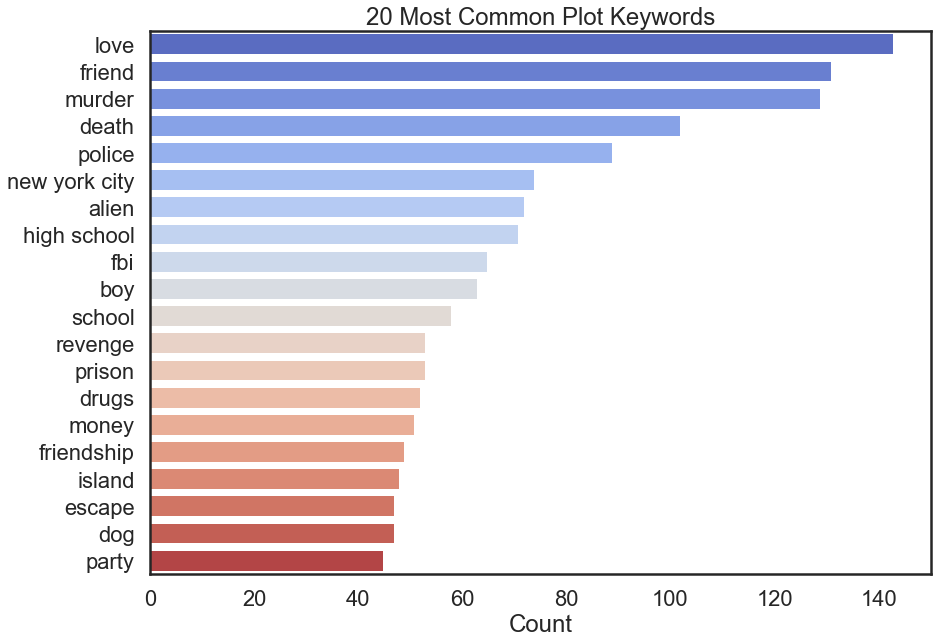

In [28]:
#set plot style and size
sns.set(style="white", context="poster")
plt.figure(figsize=(14, 10))

#create a horizontal bar chart for top 20 plot keywords
sns.countplot(data=movies3, y ='plot_keywords',palette="coolwarm", \
    order = movies3.plot_keywords.value_counts().head(20).index) \
    .set_title('20 Most Common Plot Keywords')
    
plt.ylabel('')
plt.xlabel('Count')

## Top 10 Movies with the Highest IMDB Score
Here, we created a table on the top 10 movies with highest IMDB score. Both Francis Coppola and Chris Nolan have two top rated movies. It is interesting to find ourt that most of these films are released in the 90s with only two films are released after 2005.

In [29]:
# create a dataframe to show the top 10 movies with the highest movie scores
movies[['movie_title', 'imdb_score','director_name','title_year']] \
    .sort_values('imdb_score',ascending=True) \
    .nlargest(10,'imdb_score')

,movie_title,imdb_score,director_name,title_year
1937,The Shawshank Redemption,9.3,Frank Darabont,1994
3466,The Godfather,9.2,Francis Ford Coppola,1972
2837,The Godfather: Part II,9.0,Francis Ford Coppola,1974
66,The Dark Knight,9.0,Christopher Nolan,2008
1874,Schindler's List,8.9,Steven Spielberg,1993
3355,Pulp Fiction,8.9,Quentin Tarantino,1994
339,The Lord of the Rings: The Return of the King,8.9,Peter Jackson,2003
4498,"The Good, the Bad and the Ugly",8.9,Sergio Leone,1966
683,Fight Club,8.8,David Fincher,1999
2051,Star Wars: Episode V - The Empire Strikes Back,8.8,Irvin Kershner,1980


## Calculate Movie Profits
We also want to look into the financials of each movie. Thus, we created a new column 'profits' here.

In [30]:
#create a new 'profits' column
movies['profits']=movies.gross-movies.budget

#set the column datatype to integer
movies.profits.astype(int)
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,profits
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,0,0,0,0,1,0,0,0,0,523505847
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,0,0,0,0,0,0,0,0,0,9404152
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,0,0,0,0,0,0,1,0,0,-44925825
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,0,0,0,0,0,0,1,0,0,198130642
5,Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,...,0,0,0,0,1,0,0,0,0,-190641321


## Movie Investment Trends
For this chart, we are looking into the movie investment trends from 1970 to 2015. The gap between profits and budget/gross have been widened since 1995. Although movie budget has been increasing and reached to its peak around 2006, profits have remained relatively unchanged throughout the years expect for the plummet around 2006. On the other hand, gross has increased steadily, performing above the budget line expect for 2006.

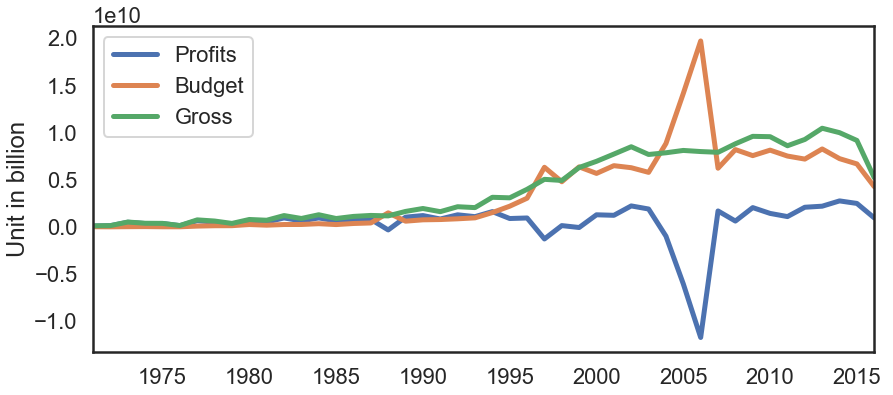

In [31]:
#set plot style
sns.set(style="white", context="poster")

#
movies[movies['title_year']> 1970].groupby('title_year').profits.sum() \
    .plot(figsize=(14,6),label='Profits',linewidth=5) 
    
movies[movies['title_year']> 1970].groupby('title_year').budget.sum(). \
    plot(figsize=(14,6),label='Budget',linewidth=5)
    
movies[movies['title_year']> 1970].groupby('title_year').gross.sum(). \
    plot(figsize=(14,6),label='Gross',linewidth=5).legend()
    
plt.ylabel('Unit in billion')
plt.ticklabel_format(useOffset=False)
plt.xlabel('')
plt.style.use('seaborn-white')

## Movie Return on Investment Trends 
For this scatter chart, we have plotted all the movies datae points from this dataset as we want to analysize the relationships among the movie scores, year and return on investment. First, we calculated the percentage of ROI here using profits/budget * 100. We used different colors to represent the ROI. 

Based on this plot, we see that a majority of movies have a ROI in the lower range of the colorbar-- around 100%. There are also some movies performed a much higher ROI with over 500% of returns represented in yellow. Interestingly, we don't see many movies performed in the middle range, which are represented in green. It seems like movies investments tend to perform at the extremes, either highly profitble or relatively poor. 

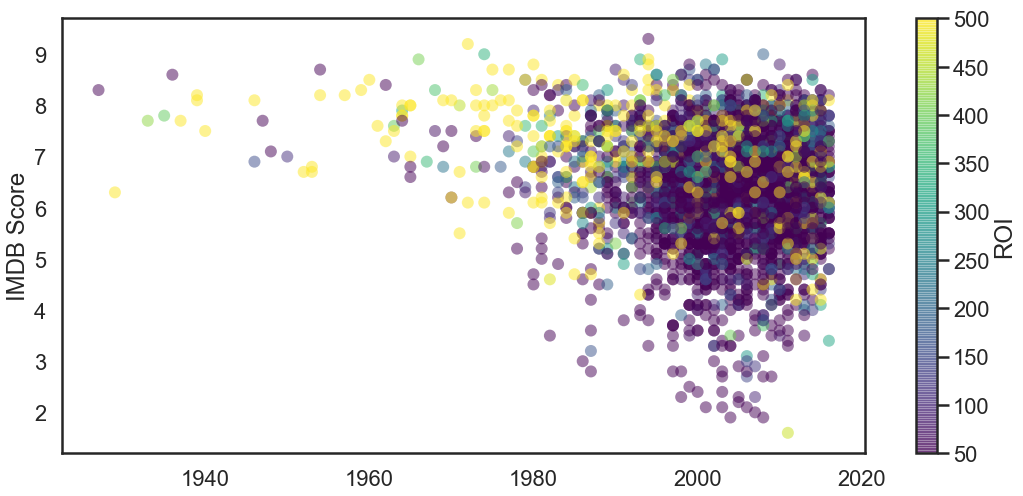

In [32]:
sns.set(style="white", context="poster")
plt.figure(figsize=(18, 8))

d=movies[['title_year', 'imdb_score','profits','budget']]

plt.scatter(d.title_year,d.imdb_score, label=None,c=(d.profits/d.budget)*100,cmap='viridis',linewidth=0,alpha=0.5)
plt.axis(aspect='equal')

plt.xlabel('')
plt.ylabel('IMDB Score')
plt.colorbar(label='ROI')
plt.clim(50,500)


## Foreign Lanaguage Vs. English Movies Duration Comparison
The red line here is the average movie duration of English movies. We want to see compare the movie duration between foreign language movies and English movies, which provides insights to Netflix when producing its orginal contents. A majority of foreign language films that have longer durations are in South East Asian and South Asian languages, such as Thai, Vietnanese, Hindi and Filipino. German films tend to be longer as well. French and Spanish language films are more align with English film length.

Text(0.5,1.05,'Foreign Language Movie Duration')

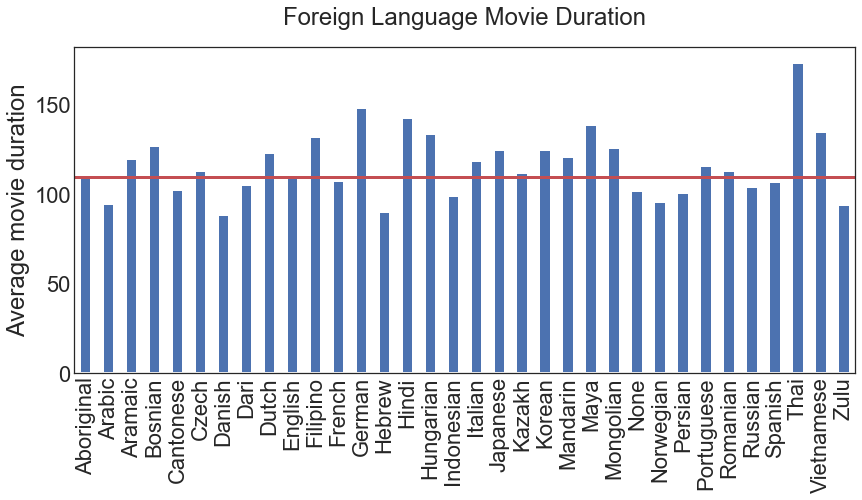

In [34]:
sns.set(style="white", context="poster")
plt.style.use('seaborn-white')
plt.figure(figsize=(14, 6))

movies.groupby('language').duration.mean().plot(kind='bar')
plt.axhline(y=110, color='r', linestyle='-')

plt.xlabel('')
plt.ylabel('Average movie duration')
plt.title('Foreign Language Movie Duration',y=1.05)

# Feature Engineering and Selection
For feature engineering, we will: 
- Transform two categorial features(country and content rating) through one-hot encoding
- Remove irrelevant categorial features

Fore feature selection, we will: 
- Remove highly correlated features to select the most relevent features

## One-hot Encoding Country
First, we want to understand the distributions of US-produced Vs. foreign-produced films in our dataset to determine whether country is an important feature. This could be an important insight for Netflix for understanding how foreign-produced films affect movie scores. 

In [35]:
movies.country.value_counts()

USA               2940
UK                 308
France             101
Germany             78
Canada              59
Australia           39
Spain               21
Japan               15
Hong Kong           13
China               11
Italy               11
New Zealand         11
South Korea          8
Denmark              8
Ireland              7
Mexico               6
Brazil               5
India                5
Iran                 4
Norway               4
Thailand             4
Argentina            3
Netherlands          3
Czech Republic       3
Russia               3
South Africa         3
Taiwan               2
Romania              2
Hungary              2
Finland              1
Chile                1
West Germany         1
Official site        1
Greece               1
Iceland              1
Georgia              1
Belgium              1
Poland               1
Israel               1
New Line             1
Indonesia            1
Peru                 1
Aruba                1
Afghanistan

We decided to keep the top five countries here, including: USA, UK, France, Germany and Canda. We then group the rest foreign-produced films together as 'Ohther  country'.

In [36]:
movies.loc[~movies['country'].isin(['USA','UK','France','Germany','Canada']),'country']= 'Other country' 
movies.country.value_counts()

USA              2940
UK                308
Other country     209
France            101
Germany            78
Canada             59
Name: country, dtype: int64

Here, we created dummy variables and transformed the 'Country' column into 6 new columns. We then joined these new columns to the moives dataframe. 

In [37]:
w=movies.country.str.get_dummies()
movies=movies.join(w)
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,Thriller,War,Western,profits,Canada,France,Germany,Other country,UK,USA
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,0,0,0,523505847,0,0,0,0,0,1
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,0,0,0,9404152,0,0,0,0,0,1
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,1,0,0,-44925825,0,0,0,0,1,0
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,1,0,0,198130642,0,0,0,0,0,1
5,Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,...,0,0,0,-190641321,0,0,0,0,0,1


## One-hot Encoding Content Rating
We will transform the 'Content Rating' feature using dummy variables as well. In the earlier data cleaning, we have already the number of content rating categories from 15 to 5 including: G, NC-17,PG,PG-13 and R.

In [38]:
v=movies.content_rating.str.get_dummies()
movies=movies.join(v)
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,France,Germany,Other country,UK,USA,G,NC-17,PG,PG-13,R
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,0,0,0,0,1,0,0,0,1,0
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,0,0,0,0,1,0,0,0,1,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,0,0,0,1,0,0,0,0,1,0
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,0,0,0,0,1,0,0,0,1,0
5,Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,...,0,0,0,0,1,0,0,0,1,0


## Remove Irrelevant Categorical Features
Similar to country, we want to first understand the distribution of English Vs.foreign language films in this dataset. Language could be an important feature as well, however, as the majority of movies are in English, we are going to remove the language feature.

In [39]:
movies.language.value_counts()

English       3539
French          34
Spanish         23
Mandarin        13
Japanese        10
German          10
Cantonese        7
Italian          7
Hindi            5
Korean           5
Portuguese       5
Norwegian        4
Thai             3
Danish           3
Dutch            3
Persian          3
Indonesian       2
Dari             2
Aboriginal       2
Kazakh           1
Mongolian        1
Hungarian        1
Filipino         1
Russian          1
Zulu             1
None             1
Hebrew           1
Bosnian          1
Romanian         1
Czech            1
Vietnamese       1
Maya             1
Aramaic          1
Arabic           1
Name: language, dtype: int64

In this dataset, we also have categorical features on the actor and director names, the movie link and movie title, etc. We will remove these columns as they have very distinct values and diverge ranges. It would not be relevent for our predictive models.

In [40]:
movies=movies.drop(['color','director_name','content_rating','country', \
                    'language','plot_keywords','movie_imdb_link','actor_2_name', \
                    'actor_1_name','movie_title','actor_3_name','genres','profits'],axis=1)
movies.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'Canada',
       'France', 'Germany', 'Other country', 'UK', 'USA', 'G', 'NC-17', 'PG',
       'PG-13', 'R'],
      dtype='object')

## Remove Collinear Features
Now we are moving to the feature selection part. First, we will create a heatmap to examine the correlations between each variables. 

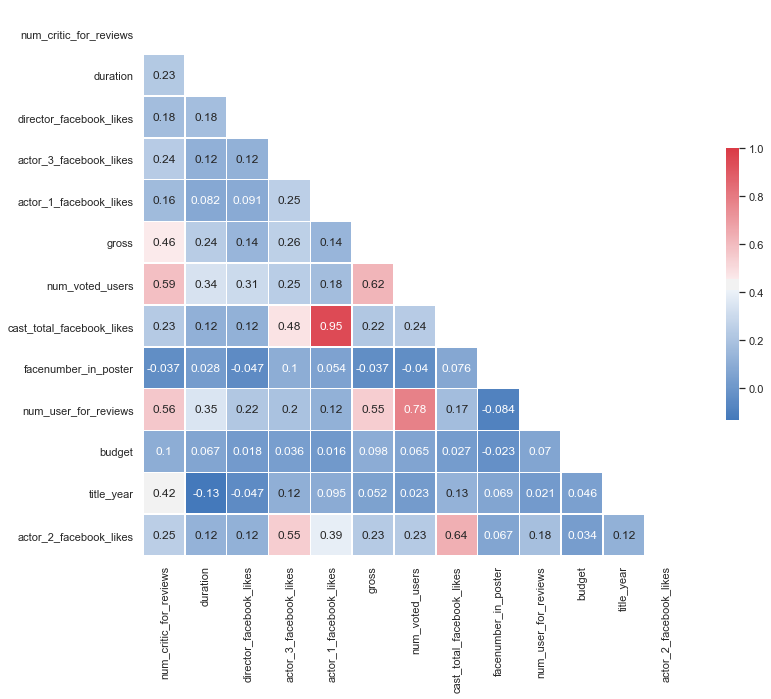

In [41]:
sns.set(style="white", context="notebook")
def CorrMtx(movies, dropDuplicates = True):
    movies =movies.iloc[:,:13].corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(movies, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f,ax = plt.subplots(figsize=(14, 10))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(movies, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax,annot=True,)
    else:
        sns.heatmap(movies, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax,annot=True,)

CorrMtx(movies, dropDuplicates = True)

As the above heatmap showed, cast_total_facebook_like has the highest correlation with actor_1_facebook_likes of 0.95. actor 2 and actor 3 also high correlations with the total facebook likes of 0.64 and 0.48 respectively. Thus, we decided to remove the cast_total facebook likes feature, and combine actor 2 and actor 3 facebook likes together as a new feature "other actors facebook likes".

We also noticed the high correlation among num_critic_for_review, num_user_for_reviews and num_voted_users. Here, we will keep the num_voted_users feature, and use the ratio of num_critic_for_review and num_user_for_reviews to create a new feature 'critic_review_ratio'. We will then drop the num_critic_for_review and num_user_for_reviews features.

In [42]:
movies['other_actors_facebook_likes']= movies['actor_2_facebook_likes'] + movies['actor_3_facebook_likes']

movies['critic_review_ratio'] = movies['num_critic_for_reviews'] / movies['num_user_for_reviews']

movies=movies.drop(['cast_total_facebook_likes','actor_2_facebook_likes', \
                    'actor_3_facebook_likes','num_critic_for_reviews','num_user_for_reviews'],axis=1)

Here is the updated heatmap. 

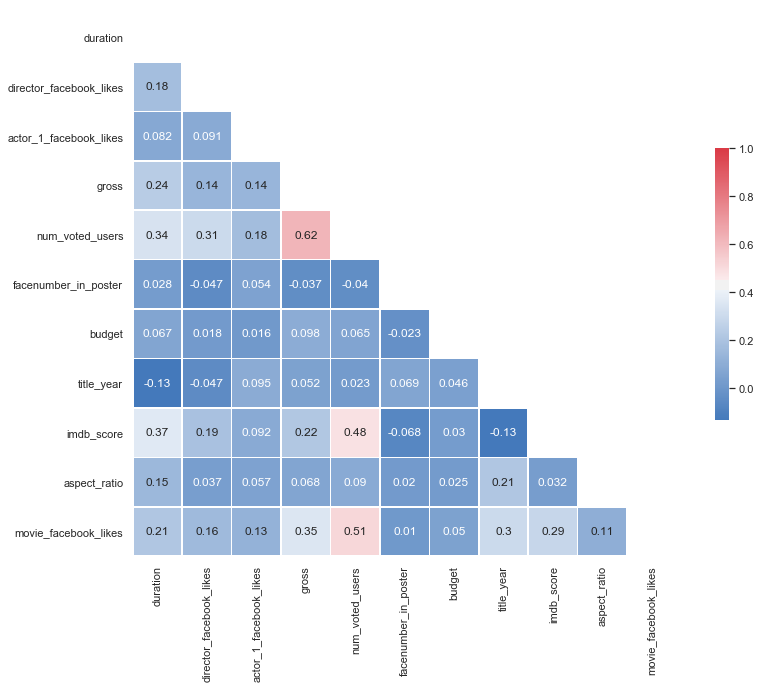

In [43]:
sns.set(style="white", context="notebook")
def CorrMtx(movies, dropDuplicates = True):
    movies =movies.iloc[:,:11].corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(movies, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f,ax = plt.subplots(figsize=(14, 10))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(movies, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax,annot=True,)
    else:
        sns.heatmap(movies, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax,annot=True,)

CorrMtx(movies, dropDuplicates = True)

Here is the our dataset after feature engineering and selection. We now have 3695 rows and 40 columns, increased from 28 columns before one-hot encoding on several categorical variables.

In [44]:
movies.columns

Index(['duration', 'director_facebook_likes', 'actor_1_facebook_likes',
       'gross', 'num_voted_users', 'facenumber_in_poster', 'budget',
       'title_year', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western', 'Canada', 'France', 'Germany',
       'Other country', 'UK', 'USA', 'G', 'NC-17', 'PG', 'PG-13', 'R',
       'other_actors_facebook_likes', 'critic_review_ratio'],
      dtype='object')

In [45]:
movies.shape

(3695, 46)

## Split Into Training and Testing Sets
Now we are ready to split the dataset into training and testing sets. We will divided the dataset into 70% of training and 30% of testing. Since we are building models on predicting movie scores, we will use the IMDB score as the target feature, and the rest 39 columns as feature columns.

In [46]:
features = movies.drop('imdb_score', axis=1)
target = pd.DataFrame(movies['imdb_score'])

X, X_test, y, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(2586, 45)
(1109, 45)
(2586, 1)
(1109, 1)


## Establish a Benchmark
Before we start to build different models, we will establish a simple benchmark first. If our models can't perform better than this benchmark, we might need to use better suited models. 

We are going to use the mean abusolute error(MAE) here as the performance metric to evalulate the result since we will be building regression models. 

Below, we will use the mean of all target values as the baseline predicted value on the IMDB scores. We then will pass the y test values and the baseline value to an MAE function. As the result shows,the baseline MAE is 0.8, which means the prediction is off by about 0.8. Since the IMDB score ranges from 1-10, the baseline result showed the mean error rate is about 8%.

In [47]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 6.60
Baseline Performance on the test set: MAE = 0.8054


## Scaling Features
The final step before building models is to scale the features as they are in different units. Thus, we want to normalize the features before implementing the models. While linear regression and tree models do not require scaling, a model that we will be using support vecot machine needs to have standardized feature.

In [48]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [49]:
# Convert y to one-dimensional array (vector)
y = np.array(y).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

# Model Evaluation
In this section, we will build the following models:
- Linear Regression
- Support Vector Machine
- Random Forest 
- Gradient Boosted Trees

We will then choose the best performing models based on the lowest MAE to further optimize this model using hyperparameter tuning techniques. At last, we will apply the test set to evelulate the final model. 

First, we will create two functions since Scikit-learn implement models in an identical way. We will create a function to calculate the MAE, and a function to fit and evaluate different models.

Here, we will use the default hyerparameters to create baseline models for now.

In [50]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

## Linear Regression 

In [161]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Logistic Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Logistic Regression Performance on the test set: MAE = 0.5651


## Support Vector Machine

In [165]:
svm = svm.SVR()
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 0.5852


## Random Forest

In [166]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)


Random Forest Regression Performance on the test set: MAE = 0.4968


To better intepret the random forest model, we will examine theh feature importance to see the most importance features to determine the IMDB score.

In [167]:
# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(features.columns), 
                                'importance': random_forest.feature_importances_})

# Show the top 15 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(15)

,feature,importance
0,num_voted_users,0.339186
1,Drama,0.130230
2,budget,0.083362
3,critic_review_ratio,0.066942
4,title_year,0.058634
5,gross,0.050485
6,duration,0.046338
7,actor_1_facebook_likes,0.030820
8,other_actors_facebook_likes,0.028247
9,director_facebook_likes,0.026646


num_voted_users, drama and budget are the top 3 important features for random forest.

Text(0.5,1.05,'Feature Importances')

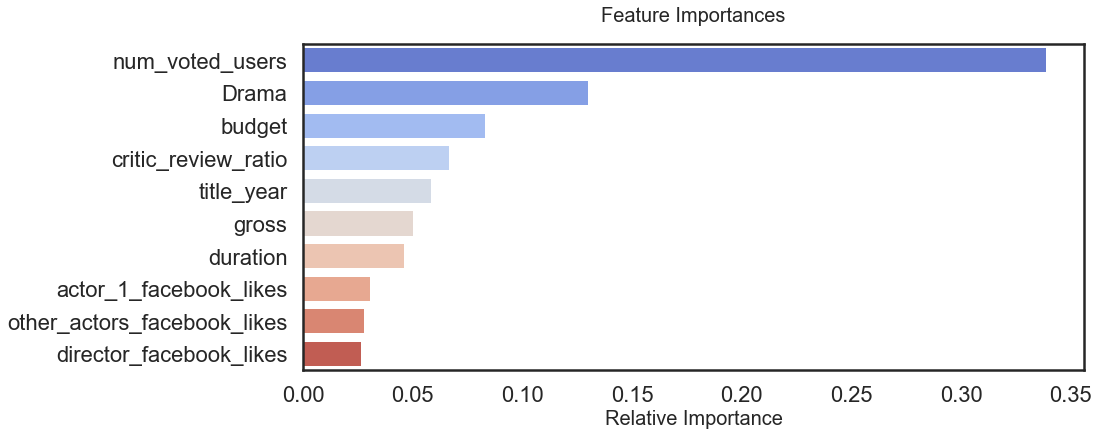

In [168]:
sns.set(style="white", context="poster")
plt.figure(figsize=(14, 6))
sns.barplot(y='feature', x='importance',data=feature_results.head(10),palette="coolwarm")

plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances', size = 20, y=1.05)

## Gradient Boosted Tree

In [176]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 0.4536


In [177]:
feature_results = pd.DataFrame({'feature': list(features.columns), 
                                'importance': gradient_boosted.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(15)

,feature,importance
0,num_voted_users,0.207074
1,critic_review_ratio,0.102159
2,title_year,0.095391
3,budget,0.086309
4,duration,0.074352
5,movie_facebook_likes,0.056166
6,gross,0.052958
7,Drama,0.037447
8,other_actors_facebook_likes,0.034752
9,director_facebook_likes,0.030704


### Model Optimization
Since gradient boosted tree has the lowest MAE compare to other models, we will focus on optimizing this model through hyperparameters tuning. It is important to point out that parameter settings affect support vector machine model greatly and using the default setting is not optimal. However for this time, we are going to optimize the gradient boosted tree model as it has the best baseline performing result. 

First, we want to see the current parameters setting for the model.

In [178]:
print('Parameters currently in use:\n')
pprint(gradient_boosted.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': 60,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}


Here we will choose 6 parameters to optimize the model and leave the rest parameters as before. We will change 'loss', 'n_estimators', 'max_depth', 'min_samples_leaf', 'min_samples_split', and 'max_features'.

In [179]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 200, 300, 400, 500,1000]

# Maximum depth of each tree
max_depth = [2, 3, 5, 8, 10]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 8]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]
 
# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In order to find the best combination of the hyperparameters to optimize our model, we will use randomized search with cross validation. While randominzed research randomly select hyperparameter combinations to evaluate, cross validation assesses the performance of the hyperparameters. 

Below, we will use 5 fold crossvalidation, pass on the hyperparameter grid we have defined earlier to parameter distrubutions, and use negative mean abosulute error for scoring. A better score would be closer to 0.

In [180]:
#decision tree under random forest, final model, tuning parameters 

# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 5-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [181]:
random_cv.fit(X, y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  4.6min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=25, n_jobs=-1,
          param_distributions={'loss': ['ls', 'lad', 'huber'], 'n_estimators': [100, 200, 300, 400, 500, 1000], 'max_depth': [2, 3, 5, 8, 10], 'min_samples_leaf': [1, 2, 4, 6], 'min_samples_split': [2, 4, 6, 8], 'max_features': ['auto', 'sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=1)

We can use best_estimator_to see the best hyperparameter combinations below. The max_depth changed from 3 to 5, n_estimators increased from 100 to 200, while min_samples_leaf and min_samples_split remained the same.

In [182]:
random_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)

### Apply Final Model on the Test Set
Now we are ready to apply the test set to our final model. We will also be creating a default model for comparison.

In [183]:
# Default model
default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
final_model = random_cv.best_estimator_

final_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)

Here provides the time for each loop. The final model takes longer time to run than the default model.

In [184]:
%%timeit -n 1 -r 5
default_model.fit(X, y)

370 ms ± 9.88 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [185]:
%%timeit -n 1 -r 5
final_model.fit(X, y)

1.56 s ± 25.7 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


Now, we will predict the IMDB scores and calculate the MAE. The final model had a slight improvement with 6% decrese of MAE. As the score ranges from 1 to 10, it means that our final model has a 95.8% of accuracy in predicting the IMDB score as it is of by 0.42.

In [186]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 0.4534.
Final model performance on the test set:   MAE = 0.4377.


In [187]:
100*(0.4238/0.4534-1)

-6.528451698279669

Here we will visulize the test and predicted scores.

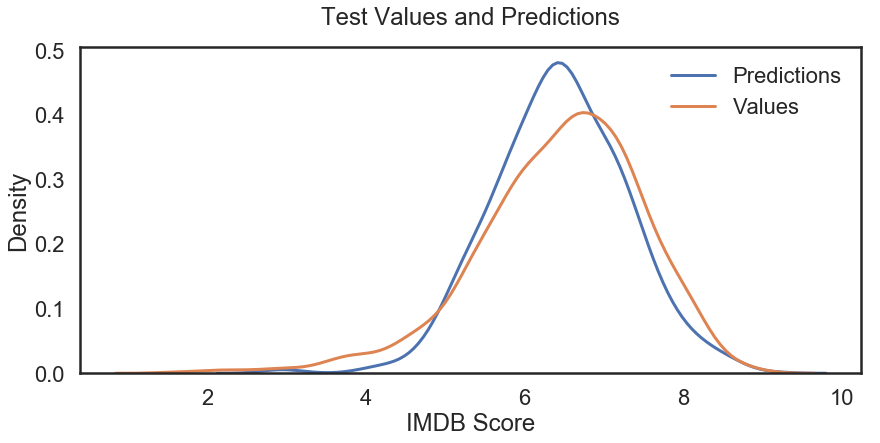

In [193]:
# Density plot of the final predictions and the test values
plt.figure(figsize=(14, 6))
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('IMDB Score'); plt.ylabel('Density');
plt.title('Test Values and Predictions',y=1.05);

### Decision Tree

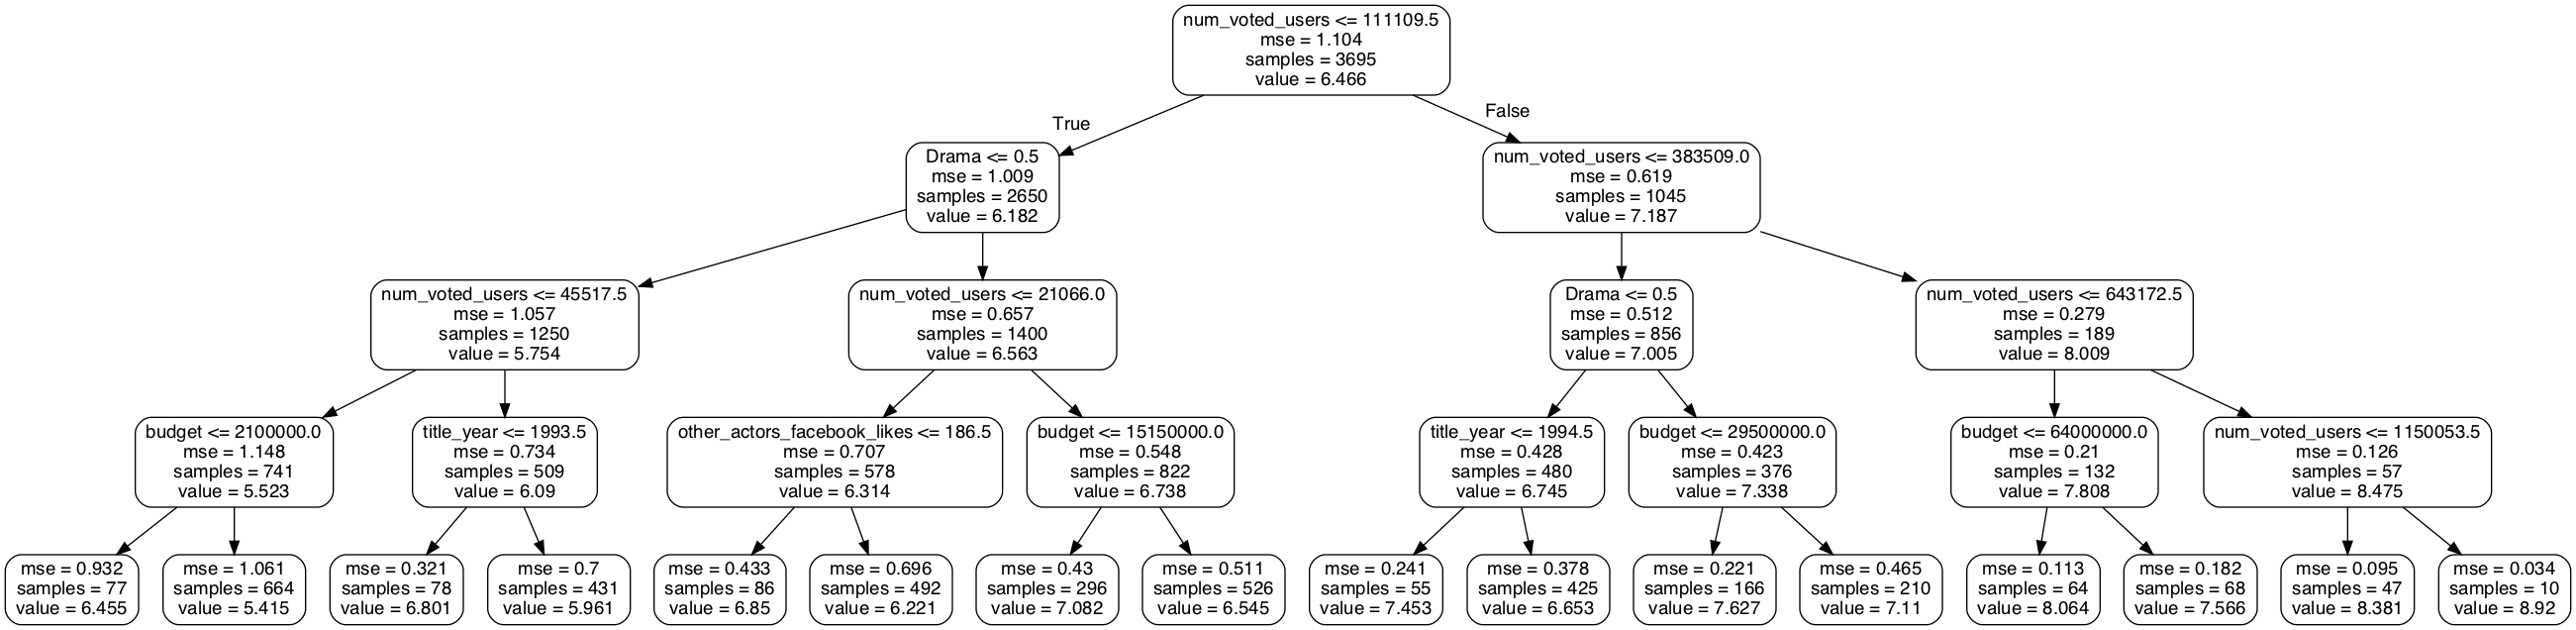

In [192]:
clf = DecisionTreeRegressor(max_depth=4)
clf = clf.fit(features,target)
y_pred = clf.predict(X_test)

dot_data= tree.export_graphviz(clf, out_file = None,rounded = True, feature_names = features.columns)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

###  Local Interpretable Model-Agnostic Explanations (LIME) 

In [219]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X, feature_names=movies.columns, class_names=['imdb_score'], training_labels = y, verbose=True, mode='regression')
i = 30
exp = explainer.explain_instance(X_test[i], final_model.predict, num_features=10)

Intercept 6.145699588813514
Prediction_local [7.17533908]
Right: 6.0235625462879385


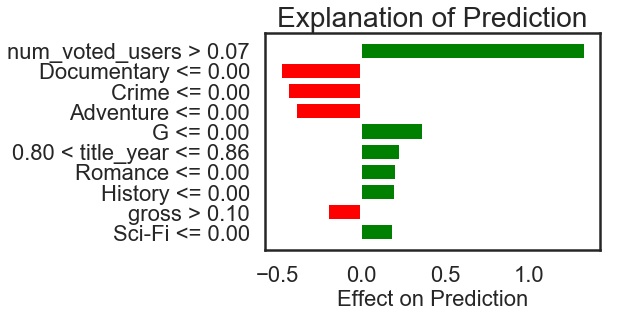

In [220]:
exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

In [221]:
exp.show_in_notebook(show_table=True)